In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
label = [
    "M", "UM", "UM", "UM", "M", "M", "UM", "M", "M", "UM",
    "M", "M", "M", "M", "UM", "UM", "UM", "UM", "UM", "M",
    "UM", "M", "UM", "M", "M", "M", "UM", "UM", "M", "M",
    None, None, None, None, None, None, None, None, None, None, None,
    "UM", "UM", "UM", "UM", "M", "M", "M", "M", "UM", "M"]


label = [
    "M", "UM", "UM", "UM", "M", "M", "UM", "M", "M", "UM",
    "M", "M", "M", "M", "UM", "UM", "UM", "UM", "UM", "M",
    "UM", "M", "UM", "M", "M", "M", "UM", "UM", "M", "M",
    "M", "UM", "UM", "UM", "M", "UM", "M", "UM", "M", "M", "M",
    "UM", "UM", "UM", "UM", "M", "M", "M", "M", "UM", "M"]

In [3]:
cluster_proportion_cll = pd.read_csv("../../data/UM-CLL_vs_M-CLL_other_data/cluster_proportion_&_median_marker_expression.csv", index_col = 0)

In [4]:
cluster_proportion_cll["label"] = label

In [7]:
df = cluster_proportion_cll[cluster_proportion_cll['label'].isin(["UM", "M"])]

# TEST AND TRAIN

In [13]:
# Assuming df is your DataFrame
# Separate features (numeric columns) and target (categorical label)
X = df.drop(columns=['label'])  # Drop the label column to get only features
y = df['label']  # Target variable

# Encode the categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to numeric form

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Normalize feature data for better KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### KNN

In [16]:



# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune 'n_neighbors' for better performance
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.5000
              precision    recall  f1-score   support

           M       0.55      0.67      0.60         9
          UM       0.40      0.29      0.33         7

    accuracy                           0.50        16
   macro avg       0.47      0.48      0.47        16
weighted avg       0.48      0.50      0.48        16



### LOGISTIC

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
# Normalize feature data for better KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.4286
              precision    recall  f1-score   support

           M       0.50      0.50      0.50        12
          UM       0.33      0.33      0.33         9

    accuracy                           0.43        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.43      0.43      0.43        21



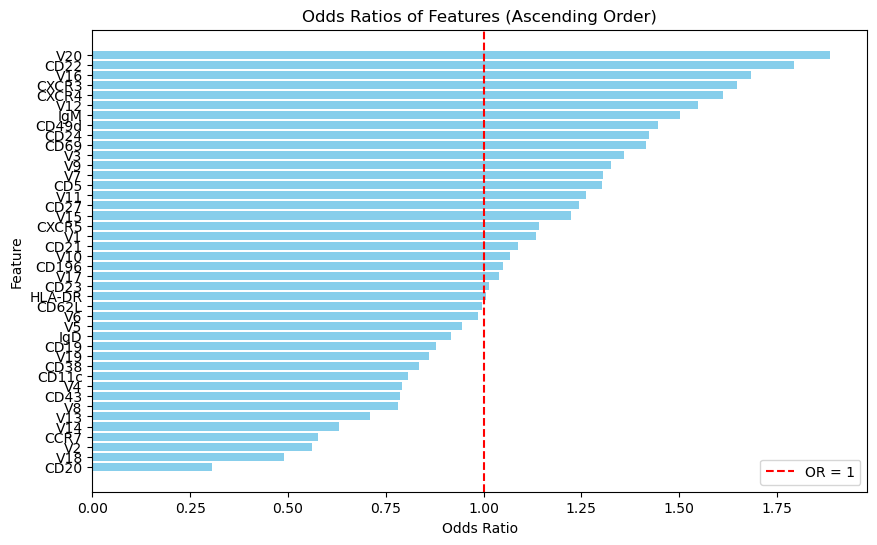

In [29]:
odds_ratios = np.exp(model.coef_[0])

# Create a DataFrame for plotting
feature_or_df = pd.DataFrame({'Feature': X.columns, 'Odds Ratio': odds_ratios})

# Sort by ascending order
feature_or_df = feature_or_df.sort_values(by='Odds Ratio', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_or_df['Feature'], feature_or_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios of Features (Ascending Order)')
plt.axvline(x=1, color='red', linestyle='--', label='OR = 1')
plt.legend()
plt.show()

RANDOM FOREST

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.3810
              precision    recall  f1-score   support

           M       0.44      0.33      0.38        12
          UM       0.33      0.44      0.38         9

    accuracy                           0.38        21
   macro avg       0.39      0.39      0.38        21
weighted avg       0.40      0.38      0.38        21



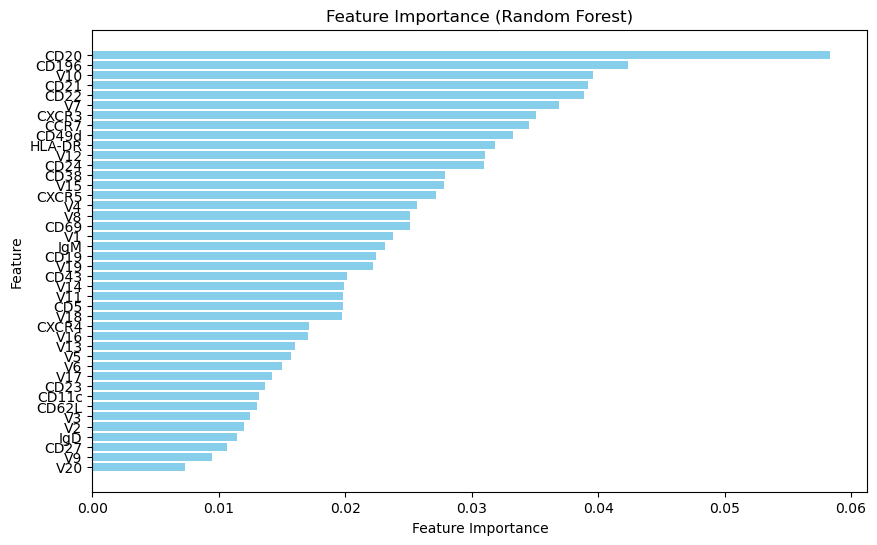

In [34]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

# ALL DATA HAS TRAINING

### KNN

In [38]:
# Assuming df is your DataFrame
# Separate features (numeric columns) and target (categorical label)
X = df.drop(columns=['label'])  # Drop the label column to get only features
y = df['label']  # Target variable

# Encode the categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to numeric form

# Normalize feature data for better KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN classifier on the entire dataset
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune 'n_neighbors' for better performance
knn.fit(X_scaled, y_encoded)

# Predict on the same dataset
y_pred = knn.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_encoded, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.7059
              precision    recall  f1-score   support

           M       0.75      0.67      0.71        27
          UM       0.67      0.75      0.71        24

    accuracy                           0.71        51
   macro avg       0.71      0.71      0.71        51
weighted avg       0.71      0.71      0.71        51



### logistic

In [41]:
model = LogisticRegression()
model.fit(X_scaled, y_encoded)

y_pred = model.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_encoded, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8627
              precision    recall  f1-score   support

           M       0.88      0.85      0.87        27
          UM       0.84      0.88      0.86        24

    accuracy                           0.86        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



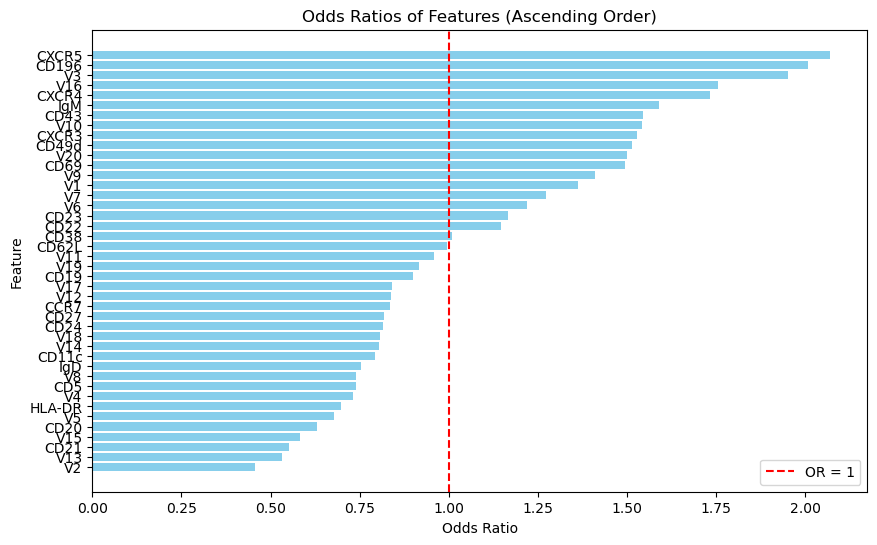

In [43]:
odds_ratios = np.exp(model.coef_[0])

# Create a DataFrame for plotting
feature_or_df = pd.DataFrame({'Feature': X.columns, 'Odds Ratio': odds_ratios})

# Sort by ascending order
feature_or_df = feature_or_df.sort_values(by='Odds Ratio', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_or_df['Feature'], feature_or_df['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios of Features (Ascending Order)')
plt.axvline(x=1, color='red', linestyle='--', label='OR = 1')
plt.legend()
plt.show()

### random forest

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y_encoded)
y_pred = model.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_encoded, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

Accuracy: 1.0000
              precision    recall  f1-score   support

           M       1.00      1.00      1.00        27
          UM       1.00      1.00      1.00        24

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



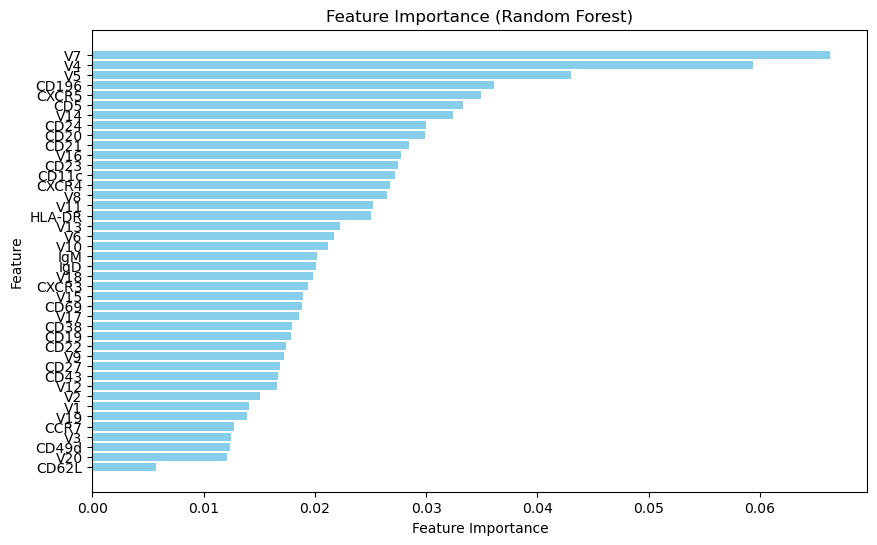

In [49]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [48]:
import shap

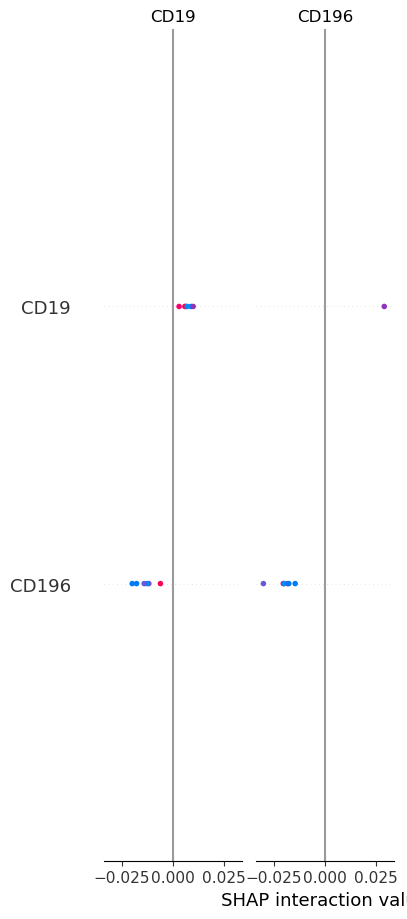

In [62]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, max_display = 10)

# Visualize the SHAP dependence plot for a specific feature
#shap.dependence_plot(0, shap_values, X_test, feature_names=df_imputed.columns)  

In [54]:
feature_name = 'CD19'
shap.dependence_plot(feature_name, shap_values, X_scaled)
###elective_surgery, bmi, 'heigh', 'first_day_lactate_min', 'first_day_wbc_min' 'first_hour_albumin_max' 'hospital_id_204'
###'icu_admit_source_Accident & Emergency' 'first_day_mbp_invasive_min' 'leukeamia', 'aids' 'solid_tumor_with_metastasis'
### 'diabetes_mellitus

ValueError: Could not find feature named: CD19

In [58]:
shap_values

array([[[ 0.00376014, -0.00376014],
        [ 0.00252502, -0.00252502],
        [ 0.01678098, -0.01678098],
        ...,
        [ 0.0223816 , -0.0223816 ],
        [ 0.00825743, -0.00825743],
        [-0.00348544,  0.00348544]],

       [[-0.00882009,  0.00882009],
        [-0.01620364,  0.01620364],
        [ 0.00840068, -0.00840068],
        ...,
        [-0.01864047,  0.01864047],
        [-0.00936464,  0.00936464],
        [ 0.00143719, -0.00143719]],

       [[-0.02022073,  0.02022073],
        [-0.00953415,  0.00953415],
        [-0.01533321,  0.01533321],
        ...,
        [-0.01299226,  0.01299226],
        [-0.0093467 ,  0.0093467 ],
        [-0.00032814,  0.00032814]],

       ...,

       [[ 0.04370011, -0.04370011],
        [ 0.00566393, -0.00566393],
        [ 0.00553075, -0.00553075],
        ...,
        [ 0.0071193 , -0.0071193 ],
        [ 0.00874985, -0.00874985],
        [-0.00386936,  0.00386936]],

       [[-0.00390572,  0.00390572],
        [-0.00131626,  0.00

In [51]:
###### PLOT 

C:\Users\rajim\AppData\Local\Temp\ipykernel_18044\3587847372.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(or_values.values()), y=list(or_values.keys()),


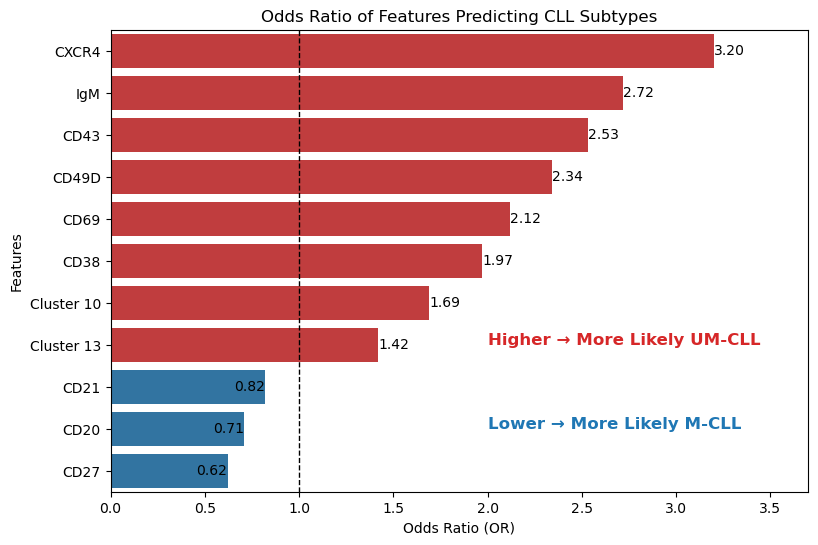

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define OR values
or_values_above_1 = {
    "CXCR4": 3.2, 
    "IgM": 2.72, 
    "CD43": 2.53, 
    "CD49D": 2.34, 
    "CD69": 2.12, 
    "CD38": 1.97, 
    "Cluster 10": 1.69, 
    "Cluster 13": 1.42
}

or_values_below_1 = {
    "CD27": 0.62, 
    "CD20": 0.71, 
    "CD21": 0.82
}

# Sort in the required order
or_values_above_1 = dict(sorted(or_values_above_1.items(), key=lambda x: x[1], reverse=True))
or_values_below_1 = dict(sorted(or_values_below_1.items(), key=lambda x: x[1], reverse=True))

# Combine both dictionaries
or_values = {**or_values_above_1, **or_values_below_1}

# Plot
plt.figure(figsize=(9, 6))
sns.barplot(x=list(or_values.values()), y=list(or_values.keys()), 
            palette=["#D62728" if v > 1 else "#1F77B4" for v in or_values.values()])

# Add values above bars
for index, (feature, value) in enumerate(or_values.items()):
    plt.text(value, index, f"{value:.2f}", va='center', ha="left" if value > 1 else "right", fontsize=10)

# Add reference line at OR = 1
plt.axvline(x=1, color="black", linestyle="--", linewidth=1)

# Labels and Formatting
plt.xlabel("Odds Ratio (OR)")
plt.ylabel("Features")
plt.title("Odds Ratio of Features Predicting CLL Subtypes")

# Add interpretation annotations
plt.text(2.0, 7, "Higher → More Likely UM-CLL", fontsize=12, color="#D62728", fontweight='bold')
plt.text(2.0, 9, "Lower → More Likely M-CLL", fontsize=12, color="#1F77B4", fontweight='bold')

# Set x-axis limit
plt.xlim(0, max(or_values.values()) + 0.5)

plt.show()
